              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.80      0.89      0.84         9
           2       0.50      0.50      0.50         8
           3       0.62      0.62      0.62         8
           4       1.00      0.67      0.80         3

    accuracy                           0.84        57
   macro avg       0.78      0.74      0.75        57
weighted avg       0.85      0.84      0.84        57



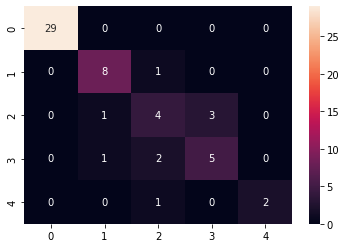

In [13]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


data = pd.read_csv("./data/cleveland_final.csv")
X = data.drop(['num'], axis = 1)
Y = data.num.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.50      0.78      0.61         9
           2       1.00      0.25      0.40         8
           3       0.88      0.88      0.88         8
           4       1.00      0.67      0.80         3

    accuracy                           0.82        57
   macro avg       0.86      0.71      0.73        57
weighted avg       0.87      0.82      0.81        57



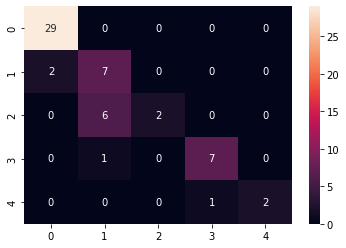

In [14]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.50      0.89      0.64         9
           2       0.00      0.00      0.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         3

    accuracy                           0.84        57
   macro avg       0.69      0.78      0.72        57
weighted avg       0.76      0.84      0.79        57



/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

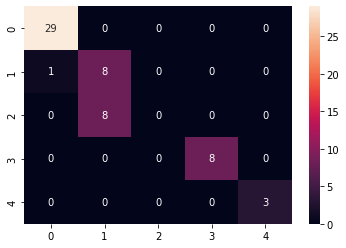

In [15]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        29
           1       0.29      0.56      0.38         9
           2       0.00      0.00      0.00         8
           3       0.50      0.12      0.20         8
           4       1.00      1.00      1.00         3

    accuracy                           0.67        57
   macro avg       0.52      0.54      0.50        57
weighted avg       0.59      0.67      0.60        57



/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

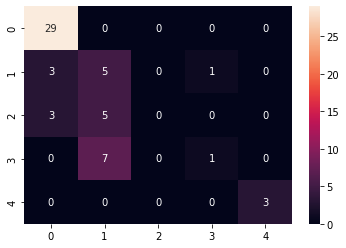

In [16]:
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [17]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

data = pd.read_csv("./data/cleveland_final.csv")
X = data.drop(['num'], axis = 1)
Y = data.num.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=10)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=10, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
hensemble = VotingClassifier(estimatorsh, voting ='hard')
sensemble = VotingClassifier(estimatorss, voting ='soft')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        29
           1       0.35      0.67      0.46         9
           2       0.50      0.12      0.20         8
           3       0.67      0.25      0.36         8
           4       1.00      0.67      0.80         3

    accuracy                           0.70        57
   macro avg       0.68      0.54      0.55        57
weighted avg       0.72      0.70      0.67        57



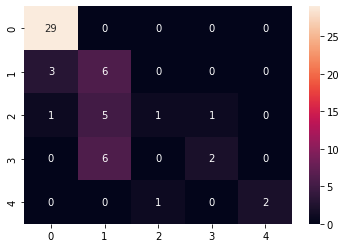

In [18]:
hensemble.fit(X_train, y_train)
y_pred = hensemble.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.80      0.89      0.84         9
           2       0.56      0.62      0.59         8
           3       0.71      0.62      0.67         8
           4       1.00      0.67      0.80         3

    accuracy                           0.86        57
   macro avg       0.81      0.76      0.78        57
weighted avg       0.87      0.86      0.86        57



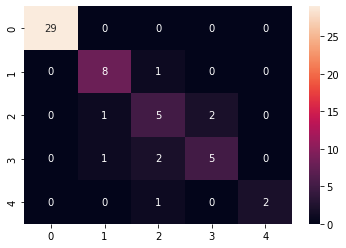

In [19]:
sensemble.fit(X_train, y_train)
y_pred = sensemble.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [20]:
data = pd.read_csv("./data/cleveland_short.csv")
X = data.drop(['num'], axis = 1)
Y = data.num.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier



seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=10)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=10, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
hensemble = VotingClassifier(estimatorsh, voting ='hard')
sensemble = VotingClassifier(estimatorss, voting ='soft')

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.09      0.11      0.10         9
           2       0.22      0.25      0.24         8
           3       0.33      0.12      0.18         8
           4       0.00      0.00      0.00         3

    accuracy                           0.54        57
   macro avg       0.29      0.28      0.27        57
weighted avg       0.50      0.54      0.51        57



/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

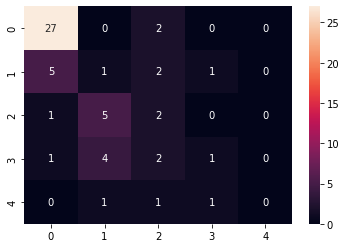

In [22]:
hensemble.fit(X_train, y_train)
y_pred = hensemble.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))